# Introducción

En todo test de hipótesis uno elige un estadístico que sea sensible a la hipótesis que quiere testear. A su vez, elige como hipótesis nula (H0) aquella que quiere rechazar y establece un valor de significancia, el cual nos permite rechazar la H0 si el Pvalor es menor a este o al menos decir,si es que el Pvalor da mas grande que el valor de significancia establecido, que dado el valor medido de nuestro estadístico (es decir, su realización al evaluar en nuestro datos) no podemos rechazar la H0.

Tanto en un caso como en el otro, el Pvalor representa la probabilidad de haber medido lo que medí o algo peor, donde aquello que se interprete por "peor" depende de la hipótesis que se esté testeando.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp
import random as rm
import math
from copy import deepcopy

In [38]:
# Paso la base de datos.
datos = []
with open("Datos.txt") as file:
    for line in file:
        line = line.strip()
        datos.append (int(line))
    file.close()
    
# Porque inicialmente mi lista no se encontraba ordenada.
datos.sort()

## -------------- ** -------------- ##
# Para el punto 5.
datos_palermo = []
with open("Datos_Palermo.txt") as file:
    for line in file:
        line = line.strip()
        datos_palermo.append (int(line))
    file.close()

## -------------- ** -------------- ##
# Para calcular error del histograma.
def error_histograma (alt_T_indep,anch_T_indep):
    centrobin = []
    for i in range (len(alt_T_indep)):
        centrobin.append (1/2*(anch_T_indep[i+1] + anch_T_indep[i]))
    
    ancho_bines = []
    for i in range (len(alt_T_indep)):
        ancho_bines.append (anch_T_indep[i+1] - anch_T_indep[i])
    
    err_histograma = []
    for i in range (len(alt_T_indep)):
        err_histograma.append(math.sqrt(N*alt_T_indep[i]*ancho_bines[i]*(1 - ancho_bines[i]*alt_T_indep[i]))/(N*ancho_bines[i]))
    return centrobin,err_histograma

# Punto 3

### Punto 3.1

El valor del estadistico Tk tomando la distancia a una uniforme es: 0.059


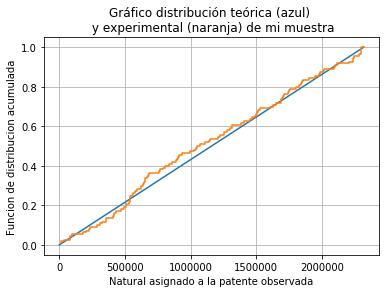

In [39]:
datos = datos
alt_datos = np.arange(1,len(datos)+1)/len(datos)

x = np.linspace (1,max(datos),max(datos))
alt_teorica = stats.uniform.cdf(x, loc=1, scale=max(datos))

## -------------- ** -------------- ##
aux4 = []
for i in range(len(datos)):
    aux1 = datos[i]
    aux2 = alt_datos[i]
    aux3 = alt_teorica [aux1-1]
    aux4.append (abs(aux2-aux3))

estadistico_TK_datos = max(aux4)

## -------------- ** -------------- ##
print ("El valor del estadistico Tk tomando la distancia a una uniforme es:",round(estadistico_TK_datos,3))

plt.plot (x,alt_teorica)
plt.step (datos,alt_datos)
plt.title ("Gráfico distribución teórica (azul) \n y experimental (naranja) de mi muestra")
plt.xlabel ("Natural asignado a la patente observada")
plt.ylabel ("Funcion de distribucion acumulada")

## -------------- ** -------------- ##
plt.grid ()
plt.show ()

Asumiendo que la distribución teórica (Fx) es una uniforme, y simulando distintas muestras uniformes, de las cuales se obtuvo su distribución acumulada experimental, obtuve distintas realizaciones del estadístico de Kolmogorov con las cuales elaboré un histograma.

El p_valor con mis datos es: 23.5 %
El Tk critico a partir del cual la significancia es 5%: 0.085


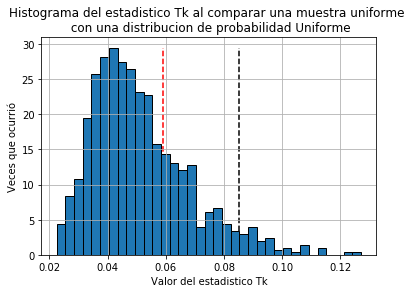

In [40]:
# Seguimos en el 3.1
def simulacion_TK (N,tamaño_muestra):
    valores_simulados_Tk = []
    max_auto_circulacion = 2428510
    for _ in range (N):
        muestra_aleatoria = []
        for i in range (tamaño_muestra):
            muestra_aleatoria.append (rm.randint (1,max_auto_circulacion))

        muestra_aleatoria.sort ()
        alt_muestra = np.arange(1,len(muestra_aleatoria)+1)/len(muestra_aleatoria)

        x = np.linspace (1,max(muestra_aleatoria),max(muestra_aleatoria))
        alt_teorica = stats.uniform.cdf(x, loc=1, scale=max(muestra_aleatoria))

        aux4 = []
        for i in range(len(muestra_aleatoria)):
            aux1 = muestra_aleatoria[i]
            aux2 = alt_muestra[i]
            aux3 = alt_teorica [aux1-1]
            aux4.append (abs(aux2-aux3))
        valores_simulados_Tk.append (max(aux4))
    return valores_simulados_Tk

## -------------- ** -------------- ##
valores_histograma_Tk = []
with open("Simulacion_Estadistico_Tk_Unif_3.1.txt") as file:
    for line in file:
        line = line.strip()
        if isinstance(line,str) is True:
            valores_histograma_Tk.append (float(line))
        else:
            valores_histograma_Tk.append (line)
    file.close()

## -------------- ** -------------- ##
# valores_histograma_Tk = simulacion_TK (1000,250)
alt_Tk, anch_Tk, _ = plt.hist (valores_histograma_Tk, edgecolor = "black", density = True, bins = 35)
alt_Tk = alt_Tk.tolist ()
anch_Tk = anch_Tk.tolist ()
plt.title ("Histograma del estadistico Tk al comparar una muestra uniforme \n con una distribucion de probabilidad Uniforme")
plt.xlabel ("Valor del estadistico Tk")
plt.ylabel ("Veces que ocurrió")

## -------------- ** -------------- ##
aux = deepcopy (anch_Tk)
aux.append (estadistico_TK_datos)
aux.sort ()
l = aux.index(estadistico_TK_datos) # Este indice en anch_T[l] es el elemento siguiente a T_datos
param = anch_Tk[l]
pTk_value = 0
while param <= anch_Tk[-2]:
    area = (anch_Tk[l+1] - anch_Tk[l])*alt_Tk[l]
    pTk_value = pTk_value + area
    l = l + 1
    param = anch_Tk [l]

print ("El p_valor con mis datos es:",round(pTk_value*100,2),"%")

## -------------- ** -------------- ##
# Quiero hallar el Tkc a partir del cual la integral da alfa = 5%
aux2 = 0
j = 0
while aux2 < 0.95:
    aux3 = (anch_Tk[j+1] - anch_Tk[j])*alt_Tk[j]
    aux2 = aux2 + aux3
    j = j + 1
Tkc = anch_Tk [j]
print ("El Tk critico a partir del cual la significancia es 5%:",round(Tkc,3))

## -------------- ** -------------- ##
plt.vlines (estadistico_TK_datos,min(alt_Tk),max(alt_Tk),color='red',linestyle='dashed', zorder=1)
plt.vlines (Tkc,min(alt_Tk),max(alt_Tk),color='black',linestyle='dashed', zorder=1)

## -------------- ** -------------- ##
plt.grid ()
plt.show ()

En este caso, tomando como valor de significancia alfa = 5%, no puede descartarse la hipótesis nula de que mi muestra tenga distribución uniforme.

### Punto 3.2

Ahora bien suponiendo que mi muestra tiene distribución exponencial, i.e., que el natural asignado a cada patente nueva observada presenta una distribución exponencial, simulé la distribución del estadístico de Kolmogorov, representando en este caso la máxima diferencia entre la distribución experimental (de una muestra exponencial) y la función de distribución acumulada de una uniforme, porque estamos testeando contra una uniforme en este test.

La potencia del test es: 100 %


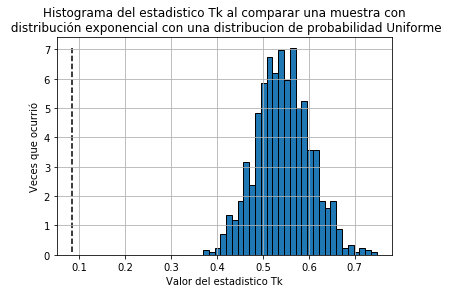

In [41]:
def simulacion_exp (N,tamaño_muestra):
    valores_simulados_Tk_exp = []
    for _ in range (N):
        muestra_aleatoria = []
        for i in range (tamaño_muestra):
            muestra_aleatoria.append (round(np.random.exponential(scale=1/(4*(10**(-7))))))

        muestra_aleatoria.sort ()
        alt_muestra = np.arange(1,len(muestra_aleatoria)+1)/len(muestra_aleatoria)

        x = np.linspace (1,max(muestra_aleatoria),max(muestra_aleatoria))
        alt_teorica = stats.uniform.cdf(x, loc=0, scale=max(muestra_aleatoria))

        aux4 = []
        for i in range(len(muestra_aleatoria)):
            aux1 = muestra_aleatoria[i]
            aux2 = alt_muestra[i]
            aux3 = alt_teorica [aux1-1]
            aux4.append (abs(aux2-aux3))
        valores_simulados_Tk_exp.append (max(aux4))
    return valores_simulados_Tk_exp

## -------------- ** -------------- ##
valores_histograma_exp = []
with open("Simulacion_Estadistico_Tk_exp_3.2.txt") as file:
    for line in file:
        line = line.strip()
        if isinstance(line,str) is True:
            valores_histograma_exp.append (float(line))
        else:
            valores_histograma_exp.append (line)
    file.close()
## -------------- ** -------------- ##
# valores_histograma_exp = simulacion_exp (1000,250)
alt_exp, anch_exp, _ = plt.hist (valores_histograma_exp, edgecolor = "black", density = True, bins = 30)
alt_exp = alt_exp.tolist ()
anch_exp = anch_exp.tolist ()
plt.title ("Histograma del estadistico Tk al comparar una muestra con" 
           "\n distribución exponencial con una distribucion de probabilidad Uniforme")
plt.xlabel ("Valor del estadistico Tk")
plt.ylabel ("Veces que ocurrió")

## -------------- ** -------------- ##
beta = 0
aux4 = deepcopy (anch_exp)
aux4.append (Tkc)
aux4.sort ()
l = aux4.index(Tkc) # Este indice en anch_T[l] es el elemento siguiente a T_datos
# maximo = anch_exp[l-1]
i = 0
while i < l-1:
    area = (anch_exp[i+1] - anch_exp[i])*alt_exp[i]
    beta = beta + area
    i = i + 1
potencia = 1 - beta
print ("La potencia del test es:",potencia*100,"%")

## -------------- ** -------------- ##
plt.vlines (Tkc,min(alt_exp),max(alt_exp),color='black',linestyle='dashed', zorder=1)

## -------------- ** -------------- ##
plt.grid()
plt.show()

Dicha potencia nos indica que la probabilidad de aceptar la hipótesis H1, i.e., que la distribución de patentes sigue una exponencial, dado que esta hipótesis es cierta es 100%.

# Punto 4

### Punto 4.1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


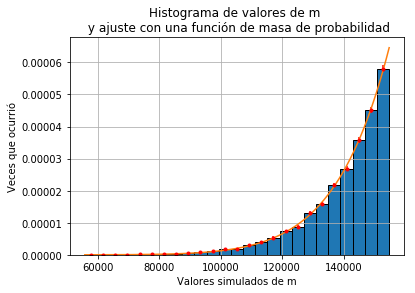

In [42]:
def simulacion_valor_m (N,n,pat_observadas):
    m = []
    for _ in range (N):
        muestra_aleatoria = []
        for i in range (pat_observadas):
            muestra_aleatoria.append (rm.randint (1,n))
        m.append (max(muestra_aleatoria))
    return m

pat_limit = 2163201
N = 10000
n = max(datos) - pat_limit
k = 10
valores_histograma_m = simulacion_valor_m(N,n,k)
alt_m, anch_m, _ = plt.hist (valores_histograma_m, edgecolor = "black", density = True,bins = 25)
alt_m = alt_m.tolist()
anch_m = anch_m.tolist ()
plt.title ("Histograma de valores de m \n y ajuste con una función de masa de probabilidad")
plt.xlabel ("Valores simulados de m")
plt.ylabel ("Veces que ocurrió")

## -------------- ** -------------- ##
x = np.linspace (min(anch_m),max(anch_m),max(anch_m)+1-min(anch_m))
y = []
for i in range (len(x)):
    y.append (sp.special.binom(x[i]-1, k-1)/sp.special.binom(n, k))
plt.plot (x,y)

## -------------- ** -------------- ##
centrobin = error_histograma (alt_m,anch_m)[0]
yerr = error_histograma (alt_m,anch_m)[1]
plt.errorbar (centrobin,alt_m,yerr = yerr, fmt = " .r") 

plt.grid ()
plt.show()

### Punto 4.2 y 4.3

Al momento de realizar la inferencia bayesiana, uno supone que el parámetro que quiere estimar con un cierto intervalo es una variable aleatoria, si bien estrictamente no puede decirse que asi lo sea uno lo piensa como si asi fuera; de esta manera le asigna una probabilidad y luego calcula su valor medio como si fuera una variable aleatoria.

Para la resolución de este item elaboré una lista que tiene todos posibles valores de m, para ello utilicé los valores de mi lista "datos", asumiendo que cada valor de ella (a partir de un valor grande) representa un valor de m (natural asociado a la patente mas nueva observada) para una muestra uniforme que va desde 1 hasta un valor n muy grande que quiero estimar.

A su vez, para la elección de los posibles valores de n tome que este como mínimo tomaba el valor de la patente mas nueva observada, ya que asumí que a todo auto nuevo producido se le asigna el número de patente inmediatamente posterior; y como máximo un valor n cualquiera.

In [29]:
S = lambda n: n*math.log(n) - n +1/2*math.log(2*math.pi*n)+1/(12*n)

## -------------- ** -------------- ##
k = 10

rango_m = np.linspace (datos[95]+1,max(datos),5000)
rango_m = rango_m.tolist ()

cota_sup = 2500000
rango_n = np.linspace (max(datos)+1,cota_sup,5000)
rango_n = rango_n.tolist ()

# Esta lista tiene en su primer elemento para un m fijo, las probabilidades variando n. En el segundo elemento tengo otro m fijo
# y las probabilidades variando los mismos n´s. Siempre tomando el mismo k.

# matriz_mn = []
# for i in range (len(rango_m)):
#     aux = []
#     for j in range (len(rango_n)):
#         aux.append (math.exp((S(int(rango_m[i])-1)-S(int(rango_m[i])-k)-S(k-1)-S(int(rango_n[j]))+S(int(rango_n[j])-k)+S(k))))
#     matriz_mn.append (aux)

## -------------- ** -------------- ##
# Valor medio de n.
aux2 = rango_m.index (max(datos))
factor_normalizacion = sum (matriz_mn[aux2])
P_n_norm = []
for i in range (len(matriz_mn[aux2])):
    P_n_norm.append ((matriz_mn[aux2][i])/factor_normalizacion)
    
valor_medio = 0
for i in range (len(P_n_norm)):
    aux3 = P_n_norm[i] * rango_n[i]
    valor_medio = valor_medio + aux3
print ("El valor medio del número n de autos con patentes nuevas en circulación es:",int(valor_medio))

# ## -------------- ** -------------- ##
# Varianza de n
varianza = 0
for i in range (len(P_n_norm)):
    aux4 = P_n_norm[i] * ((rango_n[i] - valor_medio)** 2)
    varianza = varianza + aux4
print ("La desviación estandar de este es:",int(math.sqrt(varianza)))

El valor medio del número n de autos con patentes nuevas en circulación es: 2397646
La desviación estandar de este es: 51845


### Punto 4.4

Asumiendo que m es una variable aleatoria que proviene de ser el máximo de una muestra con distribución uniforme entre 1 (AA000AA) y 2428510 (AD592MF) entonces su distribucion es P(m;k,n). Esta sería mi H0.

Para el cálculo del Pvalor asumo que haber obtenido algo peor que lo que obtuve implica haber obtenido un valor de m mas pequeño dado que observé 110 autos con patentes nuevas y que se encuentran en circulación 2428510 autos.

In [33]:
S = lambda n: n*math.log(n) - n +1/2*math.log(2*math.pi*n)+1/(12*n)

## -------------- ** -------------- ##
n = 2428510
k = len(datos)
m = max(datos)
# Lo cortamos en este valor porque para valores mas chicos que este la cola de la distribución se vuelve despreciable.
# cota1 = 2000000
# x = np.linspace (cota1+1,n,n-cota1)
# x = x.tolist()
# y = []
# for i in range (len(x)):
#     y.append (math.exp((S(x[i]-1)-S(x[i]-k)-S(k-1)-S(n)+S(n-k)+S(k))))

## -------------- ** -------------- ##
# Como quiero integrar hasta el parámetro m, busco la posición de este en la lista x.
aux = x.index(m)

## -------------- ** -------------- ##
pm_value = sp.integrate.simps (y[:aux],x[:aux])
print ("La probabilidad de obtener un valor de m como el que obtuve o uno peor (i.e. mas chico)",
       "dado que hay 2428510 autos nuevos en  circulación y observé 110 es:",round(pm_value*100,3),"%")

La probabilidad de obtener un valor de m como el que obtuve o uno peor (i.e. mas chico) dado que hay 2428510 autos nuevos en  circulación y observé 110 es: 0.597 %


# Punto 5

### Punto 5.1

Debido a que ambas muestras son suficientemente grandes como para utilizar la aproximación gaussiana, se asumió que dada la H0: "Ambas muestras provienen de una distribución con la misma esperanza"; la función de distribución del estadístico de wilcoxon es una gaussiana cuya esperanza y varianza son las del estadístico de wilcoxon.

A su vez, calculé el Pvalor asumiendo que dado el valor del estadístico de Wilcoxon que obtuve reemplazando mis datos, "algo peor" se interpreta como que este sea mas chico; porque si el valor del estadístico es mucho mas chico que su esperanza eso indica que toda una muestra tiene rango mas chico que toda la otra muestra, lo cual no puede suceder si uno asume que ambas muestras provienen de una distribución con la misma esperanza, en este caso uno esperaría que el rango de los valores de una muestra sea similar al de la otra.

Sin embargo, cuando en el punto 6 generé muestras aleatorias con distribución uniforme, para el cálculo del Pvalor se tomó como criterio que si el valor del estadístico de Wilcoxon estaba por encima de su esperanza entonces "algo peor" representaba que este fuera mas grande.

El Pvalor obtenido en la aplicación del test de Wilcoxon es: 0.23


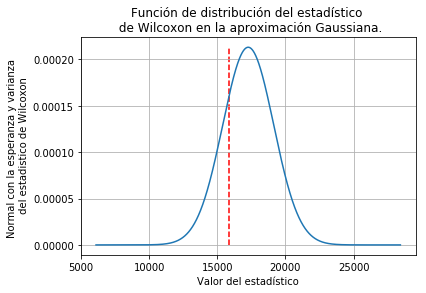

In [43]:
# Chequeo que no hay elementos repetidos entre las dos bases de datos que analizo.
elementos_repetidos = 0
for i in datos:
    if i in datos_palermo:
        elementos_repetidos = elementos_repetidos + 1

muestra1 = datos
muestra2 = datos_palermo

def test_wilcoxon(muestra1,muestra2):
    lista_concatenada = muestra1 + muestra2
    lista_concatenada.sort()

    muestra_wilcoxon = []
    for i in lista_concatenada:
        if i in muestra1:
            muestra_wilcoxon.append([i,"T"])
        elif i in muestra2:
            muestra_wilcoxon.append ([i,"P"])
    
    
    n = len (muestra1)
    m = len (muestra2)
    wmin = n*(n+1)/2
    wmax = wmin + m*n
    mu = n/2* (n+m+1)
    sigma = math.sqrt (n*m/2 * (n+m+1))

    x = np.linspace (wmin,wmax,10000).tolist()
    y = stats.norm.pdf (x,loc = mu, scale = sigma)
    
    wilcoxon_estadistico = 0
    for i in muestra_wilcoxon:
        if i[1] == "T":
            # Porque los indices los cuenta desde cero.
            wilcoxon_estadistico = wilcoxon_estadistico + muestra_wilcoxon.index (i) + 1 
    
    x_integrar = []
    y_integrar = []
        
    if wilcoxon_estadistico < mu:
        param = min(x)
        l = 0 
        while param < wilcoxon_estadistico:
            param = x[l]
            x_integrar.append (param)
            y_integrar.append (y[l])
            l = l + 1
    else:
        param = wilcoxon_estadistico
        x = deepcopy(x)
        x.append (param)
        x.sort ()
        y = stats.norm.pdf (x,loc = mu, scale = sigma)
        l = x.index(param) 
        while param < max(x):
            param = x[l]
            x_integrar.append (param)
            y_integrar.append (y[l])
            l = l + 1        
    
    pw = sp.integrate.simps (y_integrar,x_integrar)
    return x,y,pw,wilcoxon_estadistico

## -------------- ** -------------- ##
x,y,pw,wilcoxon_estadistico = test_wilcoxon (muestra1,muestra2)
plt.vlines (wilcoxon_estadistico,min(y),max(y),color='red',linestyle='dashed', zorder=1)
plt.plot (x,y)
plt.title ("Función de distribución del estadístico \n de Wilcoxon en la aproximación Gaussiana.")
plt.xlabel ("Valor del estadístico")
plt.ylabel ("Normal con la esperanza y varianza \n del estadistico de Wilcoxon")

## -------------- ** -------------- ##
print ("El Pvalor obtenido en la aplicación del test de Wilcoxon es:",round(pw,2))
# En caso de que no vinieran de la misma distribucion, ese wilcoxon_estadistico tendria que ser mas chico, indicando que toda la
# muestra tiene rangos mas pequeños.
plt.grid ()
plt.show()

### Punto 5.2 y 5.3

La distribución del estadístico U es una t-student de n + m - 2 grados de libertad. Obtuve esta luego de simular dos muestras aleatorias (ambas de largo 400) con distribución uniforme y la misma esperanza.

Luego de simular la distribución del estadístico U, y de evaluar mis datos en él para obtener la realización de este dadas mis dos muestras, calculé el Pvalor asumiendo que obtener algo mas extraño que lo que obtuve implica que el valor de U sea mas chico, i.e., mas negativo; dado que si esto ocurre nos indicaria que la diferencia entre los valores medios de ambas muestras es mayor, lo cual bajo la hipótesis nula de que ambas muestras provienen de una distribución con la misma esperanza no es esperable.

El Pvalor aplicando el test-t: 7.39 %
El estadistico U evaluado en nuestros datos: -1.78


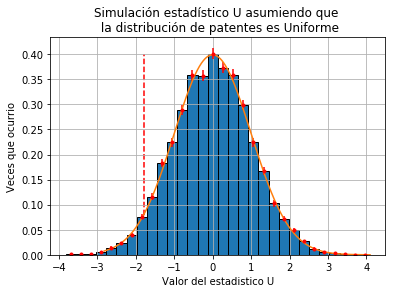

In [46]:
# Simulo la distribucion del estadistico U, asumiendo como H0: E(X)=E(Y).
def simulacion_u_est (N,n,m):
    U_est = []
    for _ in range (N):
        muestra_uniforme1 = []
        for i in range (n):
            muestra_uniforme1.append (rm.randint (1,max(datos_palermo)))

        muestra_uniforme2 = []
        for i in range (m):
            muestra_uniforme2.append (rm.randint (1,max(datos_palermo)))

        X_medio = sum(muestra_uniforme1)/n
        Y_medio = sum(muestra_uniforme2)/m

        Sx_cuad = 0
        for i in range (len(muestra_uniforme1)):
            Sx_cuad = Sx_cuad + (muestra_uniforme1[i] - X_medio)**2

        Sy_cuad = 0
        for i in range (len(muestra_uniforme2)):
            Sy_cuad = Sy_cuad + (muestra_uniforme2[i] - Y_medio)**2

        U_est.append ((X_medio - Y_medio) * math.sqrt ((m+n-2)/((1/m + 1/n)*(Sx_cuad + Sy_cuad))))
    return U_est

def test_t (muestra_uniforme1,muestra_uniforme2,valores_histograma):
    n = len (muestra_uniforme1)
    m = len (muestra_uniforme2)

    T_medio = sum(muestra_uniforme1)/n
    P_medio = sum(muestra_uniforme2)/m

    St_cuad = 0
    for i in range (len(muestra_uniforme1)):
        St_cuad = St_cuad + (muestra_uniforme1[i] - T_medio)**2

    Sp_cuad = 0
    for i in range (len(muestra_uniforme2)):
        Sp_cuad = Sp_cuad + (muestra_uniforme2[i] - P_medio)**2

    U_est_datos = (T_medio - P_medio) * math.sqrt ((m+n-2)/((1/m + 1/n)*(St_cuad + Sp_cuad)))
    
    alt,anch,_ = plt.hist (valores_histograma,density = True,bins=30)
    alt = alt.tolist()
    anch = anch.tolist()
    # Los valores histograma los pones como variable de la funcion y los generas con la otra funcion.
    if U_est_datos < (anch[alt.index(max(alt))+1] - anch[alt.index(max(alt))])/2:
        pt = 0
        param = min(anch)
        l = 0
        while param < U_est_datos:
            param = anch [l]
            area = (anch[l+1] - anch[l])*alt[l]
            pt = pt + area
            l = l + 1
    else:
        pt = 0
        aux = deepcopy(anch)
        aux.append (U_est_datos)
        aux.sort ()
        l = aux.index(U_est_datos)
        param = anch[l]
        
        while param < anch[-2]:
            area = (anch[l+1] - anch[l])*alt[l]
            pt = pt + area
            l = l + 1
            param = anch [l]
        
    
    return U_est_datos,pt
## -------------- ** -------------- ##
valores_histograma_U = []
with open("Simulacion_Estadistico_U_5.2.txt") as file:
    for line in file:
        line = line.strip()
        if isinstance(line,str) is True:
            valores_histograma_U.append (float(line))
        else:
            valores_histograma_U.append (line)
    file.close()

## -------------- ** -------------- ##
# valores_histograma_U = simulacion_u_est (10000,400,400) 
muestra_uniforme1 = datos
muestra_uniforme2 = datos_palermo
# U_est_datos,pt = test_t (muestra_uniforme1,muestra_uniforme2,valores_histograma_U)
alt_U, anch_U, _ = plt.hist (valores_histograma_U, edgecolor = "black",bins = 30, density = True)
alt_U = alt_U.tolist()
anch_U = anch_U.tolist()
plt.title ("Simulación estadístico U asumiendo que \n la distribución de patentes es Uniforme")
plt.xlabel ("Valor del estadistico U")
plt.ylabel ("Veces que ocurrio")

plt.vlines (U_est_datos,min(alt_U),max(alt_U),color='red',linestyle='dashed', zorder=1)
## -------------- ** -------------- ##
print ("El Pvalor aplicando el test-t:",round(pt*100,2),"%")
print ("El estadistico U evaluado en nuestros datos:",round(U_est_datos,2))

## -------------- ** -------------- ##
centrobin = error_histograma (alt_U,anch_U)[0]
yerr = error_histograma (alt_U,anch_U)[1]
plt.errorbar (centrobin,alt_U,yerr = yerr, fmt = " .r") 

## -------------- ** -------------- ##
# Prueba.
x = np.linspace (min(anch_U)+1,max(anch_U),1000)
y = stats.t.pdf (x,df = 400+400-2)
plt.plot (x,y)

## -------------- ** -------------- ##
plt.grid ()
plt.show ()

# Punto 6

### Punto 6.1

Supongamos que los tests son independientes y que en ambos se cumple la H0, i.e., que son comparadas dos muestras que provienen de una misma distribución con la misma esperanza; en dicho caso, ambos Pvalores presentan una distribución uniforme en [0,1].

Asumiendo esto el estadístico T presenta una distribución Chi cuadrado de 4 grados de libertad.

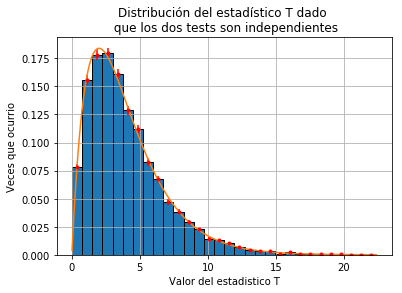

In [47]:
aux_pt = np.random.uniform ()
aux_pw = np.random.uniform ()
T_indep = []
N = 10000
for _ in range (N):
    aux_pt = np.random.uniform ()
    aux_pw = np.random.uniform ()
    T_indep.append(-2*math.log (aux_pw * aux_pt))

alt_T_indep, anch_T_indep, _ = plt.hist (T_indep, edgecolor = "black",bins = 30, density = True)
alt_T_indep = alt_T_indep.tolist()
anch_T_indep = anch_T_indep.tolist ()
plt.title ("Distribución del estadístico T dado \n que los dos tests son independientes")
plt.xlabel ("Valor del estadistico T")
plt.ylabel ("Veces que ocurrio")


## -------------- ** -------------- ##
# Chequeamos que la distribucion del estadistico T cuando H0 es cierta, es la Chi cuadrado de 4 grados de libertad.
aux = np.linspace (min(anch_T_indep),max(anch_T_indep),1000)
aux2 = stats.chi2.pdf (aux,df = 4)
plt.plot (aux,aux2)

## -------------- ** -------------- ##
centrobin = error_histograma (alt_T_indep,anch_T_indep)[0]
yerr = error_histograma (alt_T_indep,anch_T_indep)[1]
plt.errorbar (centrobin,alt_T_indep,yerr = yerr, fmt = " .r") 

## -------------- ** -------------- ##
plt.grid ()
plt.show ()

### Punto 6.2

Asumiendo que poseo dos muestras con distribución uniforme y misma esperanza (esta sería mi H0), les apliqué el test de wilcoxon y del estadístico U. Luego de ello obtuve un Pvalor para cada test y cada par de muestras aleatorias generadas, con los cuales simulé distintas realizaciones del estadístico T, utilizadas para elaborar el histograma.

El Pvalor para el test dado por el estadístico T: 9.2 %


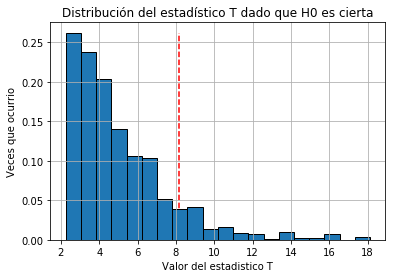

In [50]:
# Esta simulación toma aproximadamente 2 horas, debido a ello se encuentran los datos almacenados en el archivo:
# "Simulacion_Estadistico_T_6.2"

# pw = []
# pt = []
# N = 1000
# tamaño_muestras = 150
# for _ in range (N):
#     aux1 = []
#     aux2 = []
#     for _ in range (tamaño_muestras):
#         aux1.append (rm.randint (1,max(datos_palermo)))
#         aux2.append (rm.randint (1,max(datos_palermo)))
#     pw.append (test_wilcoxon(aux1,aux2)[2])
#     pt.append (test_t (aux1,aux2,valores_histograma)[1])

# valores_histograma_T = []
# for i in range (len (pw)):
#     valores_histograma_T.append(-2*math.log (pw[i] * pt[i]))

## -------------- ** -------------- ##
valores_histograma_T = []
with open("Simulacion_Estadistico_T_6.2.txt") as file:
    for line in file:
        line = line.strip()
        if isinstance(line,str) is True:
            valores_histograma_T.append (float(line))
        else:
            valores_histograma_T.append (line)
    file.close()

## -------------- ** -------------- ##
alt_T, anch_T, _ = plt.hist (valores_histograma_T, edgecolor = "black",density = True,bins=20)
alt_T = alt_T.tolist()
anch_T = anch_T.tolist()
plt.title ("Distribución del estadístico T dado que H0 es cierta")
plt.xlabel ("Valor del estadistico T")
plt.ylabel ("Veces que ocurrio")

## -------------- ** -------------- ##
# Como la función test_t realiza internamente un histograma, conviene correr la función una vez y calcular pt_datos, luego 
# identarla y volver a correr el programa para que solo se vea el histograma previamente elaborado con los valores_histograma_T.

# pt_datos = test_t (datos,datos_palermo,valores_histograma_U)[1]
pw_datos = test_wilcoxon (datos,datos_palermo)[2]
T_datos = -2*math.log (pw_datos * pt_datos)
plt.vlines (T_datos,min(alt_T),max(alt_T),color='red',linestyle='dashed', zorder=1)

## -------------- ** -------------- ##
# Calculo del Pvalor para el test con el estadístico T.
aux = deepcopy (anch_T)
aux.append (T_datos)
aux.sort ()
l = aux.index(T_datos)
param = anch_T[l]
pT_value = 0
while param <= anch_T[-2]:
    area = (anch_T[l+1] - anch_T[l])*alt_T[l]
    pT_value = pT_value + area
    l = l + 1
    param = anch_T [l]

print ("El Pvalor para el test dado por el estadístico T:",round(pT_value*100,3),"%")
## -------------- ** -------------- ##

plt.grid ()
plt.show ()

# Punto 7

Pvalor del test cuyo estadístico es m: 0.597 %


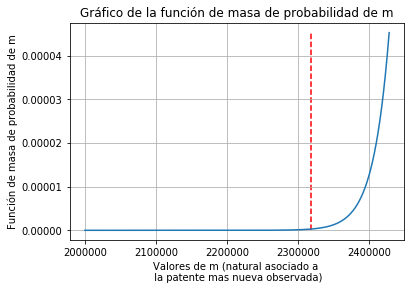

In [14]:
S = lambda n: n*math.log(n) - n +1/2*math.log(2*math.pi*n)+1/(12*n)

## -------------- ** -------------- ##
n = 2428510
k = len(datos)
m = max(datos)
# Lo cortamos en este valor porque para valores mas chicos que este la cola de la distribución se vuelve despreciable.
cota1 = 2000000
# x = np.linspace (cota1+1,n,n-cota1)
# x = x.tolist()
# y = []
# for i in range (len(x)):
#     y.append (math.exp((S(x[i]-1)-S(x[i]-k)-S(k-1)-S(n)+S(n-k)+S(k))))
plt.plot (x,y)
plt.title ("Gráfico de la función de masa de probabilidad de m")
plt.xlabel ("Valores de m (natural asociado a \n la patente mas nueva observada)")
plt.ylabel ("Función de masa de probabilidad de m")
plt.vlines (m,min(y),max(y),color='red',linestyle='dashed', zorder=1)

## -------------- ** -------------- ##
# Como quiero integrar hasta el parámetro m, busco la posición de este en la lista x.
aux = x.index(m)

## -------------- ** -------------- ##
pm_value = sp.integrate.simps (y[:aux],x[:aux])
print ("Pvalor del test cuyo estadístico es m:",round(pm_value*100,3),"%")

## -------------- ** -------------- ##
plt.grid ()
plt.show ()

De esta manera, tomamos como significancia alfa = 0.5%, asegurándonos que con el Pvalor obtenido no rechazamos la H0 de que P(m;k,n) describe la distribución del estadístico m que representa el natural asociado a la patente mas nueva observada en circulación al tomar una muestra de 110 patentes nuevas.